In [55]:
import numpy as np 
import pandas as pd 
import edhec_risk_kit as erk 
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
erk.bond_cash_flows(3, 100, 0.03, 2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [7]:
erk.bond_price(20, 1000, 0.05, 2, 0.04)

0    1136.777396
dtype: float64

In [9]:
erk.bond_price(20, 1000, 0.05, 2, 0.06)

0    884.42614
dtype: float64

In [11]:
rates = np.linspace(.01, .10, 20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [14]:
prices = [float(erk.bond_price(10, 1000, .05, 2, r)) for r in rates]
prices

[1379.7483829333992,
 1326.7629283179222,
 1276.1632981372743,
 1227.833537616068,
 1181.6636507727876,
 1137.5492793724407,
 1095.3913999300185,
 1055.0960377089511,
 1016.5739967228162,
 979.7406048086303,
 944.5154728963505,
 910.8222676519945,
 878.5884967212596,
 847.74530584692,
 818.2272871767957,
 789.9722981198867,
 762.9212901465673,
 737.0181469646424,
 712.209531536784,
 688.4447414365]

<AxesSubplot:title={'center':'Price of 10 y bond with diff interest rates'}>

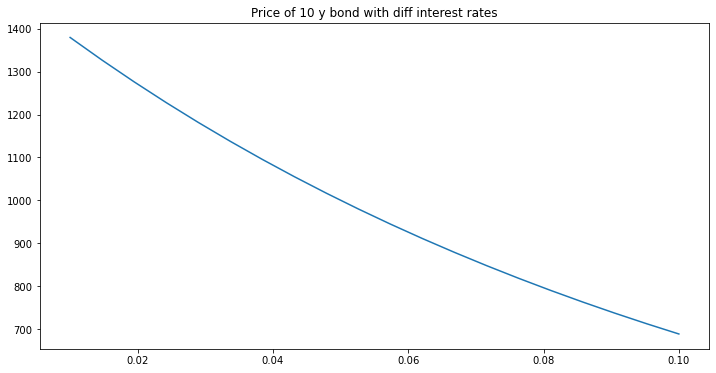

In [18]:
pd.DataFrame(data=prices, index=rates).plot(title="Price of 10 y bond with diff interest rates", legend=False, figsize=(12,6))

In [20]:
cf = erk.bond_cash_flows(3, 1000, .06, 2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [36]:
discounts = erk.discount(cf.index, .06/2)[0]
discounts

1    0.970874
2    0.942596
3    0.915142
4    0.888487
5    0.862609
6    0.837484
Name: 0, dtype: float64

In [37]:
dcf = discounts*cf 
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [41]:
weights = dcf/dcf.sum()

In [44]:
(cf.index*weights).sum()

5.579707187194534

In [51]:
erk.macaulay_duration(erk.bond_cash_flows(3, 1000,.06, 2), .06/2)

5.579707187194534

## Duration Matching

In [52]:
liabilities = pd.Series(data=[100000, 100000], index=[10, 12])
erk.macaulay_duration(liabilities, .04)

10.960799385088393

In [53]:
md_10 = erk.macaulay_duration(erk.bond_cash_flows(10, 1000, .05, 1), .04)
md_20 = erk.macaulay_duration(erk.bond_cash_flows(20, 1000, .05, 1), .04)

In [54]:
md_10, md_20 

(8.190898824083233, 13.544718122145921)

$$w_s = \frac{d_l - d_t}{d_l-d_s}$$

In [57]:
short_bond = erk.bond_cash_flows(10, 1000, .05, 1)
long_bond = erk.bond_cash_flows(20, 1000, .05, 1)

w_s = erk.match_durations(liabilities, short_bond, long_bond, .04)

In [70]:
p_short = float(erk.bond_price(10, 1000, .05, 1, .04))
p_long = float(erk.bond_price(20, 1000, .05, 1, .04))
a_0 = 130000
p_flows = pd.concat([a_0*w_s*short_bond/p_short, a_0*(1-w_s)*long_bond/p_long])

erk.macaulay_duration(p_flows, 0.04)

10.960799385088393

In [71]:
erk.macaulay_duration(liabilities, .04)

10.960799385088393

In [73]:
cfr = erk.funding_ratio(p_flows, liabilities, .04)
cfr

0    0.999876
dtype: float64

<AxesSubplot:title={'center':'Funding Ratios with changes in interest rates'}>

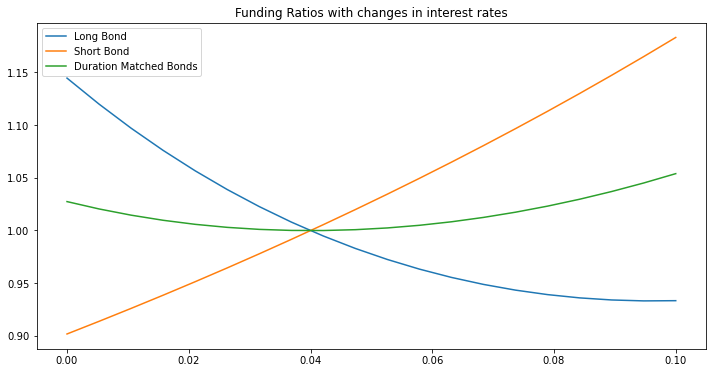

In [82]:
rates = np.linspace(0, .1, 20)
lb_assets = a_0*long_bond/p_long
sb_assets = a_0 *short_bond/p_short
fr_changes = pd.DataFrame({
    "Long Bond": [erk.funding_ratio(lb_assets, liabilities, r)[0] for r in rates], 
    "Short Bond": [erk.funding_ratio(sb_assets, liabilities, r)[0] for r in rates],
    "Duration Matched Bonds": [erk.funding_ratio(p_flows, liabilities, r)[0] for r in rates],
}, 
index =rates)
fr_changes.plot(title="Funding Ratios with changes in interest rates", figsize=(12,6))

In [79]:
fr_changes

,Long Bond,Short Bond,Duration Matched Bonds
0,1.144464,0.901852,1.027372
1,1.119809,0.913844,1.020404
2,1.096992,0.926095,1.014512
3,1.075935,0.938613,1.009659
4,1.056570,0.951405,1.005814
5,1.038829,0.964481,1.002946
6,1.022651,0.977851,1.001029
7,1.007979,0.991523,1.000037
8,0.994759,1.005508,0.999947
9,0.982943,1.019815,1.000739
